In [13]:
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# Data Importing

In [16]:
import sklearn
from sklearn import datasets 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import platform
import os
%matplotlib inline

#show the versions of the libraries that are currently in use
message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.22.1
Numpy version=1.18.1
Pandas version=1.0.1
Seaborn version=0.10.0
Python version=3.7.6


In [57]:
#Import train data 
os.chdir('D:\CAIIC')

df_train = pd.read_csv("D:\CAIIC\Competition train set.csv")
df_train.head()

,ID,DTNumber,Volume,DDate,DType,MaxTemp,MinTemp,UserNumber,UserName,Terminal,...,A15,A16,A17,A18,A19,A20,A21,A22,A23,Is_gz
0,1,MPB_331,400,2015/5/11,Column transformer,21.6,8.0,T00_58,Name_1,1300261,...,28.96,41.38,95.32,77.67,96.03,99.44,61.69,43.12,26.81,0
1,2,MPB_331,400,2015/5/12,Column transformer,29.7,15.1,T00_58,Name_1,1300261,...,32.97,29.66,89.26,66.02,86.62,105.64,64.61,50.58,34.98,0
2,3,MPB_331,400,2015/5/14,Column transformer,27.2,18.4,T00_58,Name_1,1300261,...,36.31,36.33,71.37,94.70,109.50,88.24,63.66,46.20,34.15,0
3,4,MPB_331,400,2015/5/16,Column transformer,28.0,16.4,T00_58,Name_1,1300261,...,32.40,30.98,87.14,89.75,104.45,92.71,67.89,41.82,35.72,0
4,5,MPB_331,400,2015/5/18,Column transformer,32.7,22.5,T00_58,Name_1,1300261,...,36.62,33.39,99.65,103.16,116.89,100.27,63.09,52.15,39.98,0


# Exploratory Data Analysis

In [58]:
#Showing all the information about the dataset

msg="Information of the Train Dataset"
print("*"*len(msg))
print(msg)
print("*"*len(msg))
print(df_train.info())
print()

msg="Columns in the Train Dataset"
print("*"*len(msg))
print(msg)
print("*"*len(msg))
print(df_train.columns)
print()

msg="Shape of the Train Dataset"
print("*"*len(msg))
print(msg)
print("*"*len(msg))
print(df_train.shape)
print()

msg="Descriptive statistical summary of the train dataset is shown below: "
print("*"*len(msg))
print(msg)
print("*"*len(msg))
df_train.describe()

********************************
Information of the Train Dataset
********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354288 entries, 0 to 354287
Data columns (total 38 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          354288 non-null  int64  
 1   DTNumber    354288 non-null  object 
 2   Volume      354288 non-null  int64  
 3   DDate       354288 non-null  object 
 4   DType       354288 non-null  object 
 5   MaxTemp     352977 non-null  float64
 6   MinTemp     352977 non-null  float64
 7   UserNumber  354288 non-null  object 
 8   UserName    354288 non-null  object 
 9   Terminal    354288 non-null  int64  
 10  EMANumber   354288 non-null  object 
 11  CT          354288 non-null  int64  
 12  PT          354288 non-null  int64  
 13  A0          354288 non-null  float64
 14  A1          354288 non-null  float64
 15  A2          354288 non-null  float64
 16  A3          354288 non-null  

,ID,Volume,MaxTemp,MinTemp,Terminal,CT,PT,A0,A1,A2,...,A15,A16,A17,A18,A19,A20,A21,A22,A23,Is_gz
count,354288.000000,354288.000000,352977.000000,352977.000000,3.542880e+05,354288.000000,354288.000000,354288.000000,354288.000000,354288.000000,...,354288.000000,354288.000000,354288.000000,354288.000000,354288.000000,354288.000000,354288.000000,354288.000000,354288.000000,354288.000000
mean,177144.500000,718.072924,19.666170,10.202467,1.042997e+06,250.975195,0.999845,47.770457,40.930033,37.616748,...,53.157830,54.142749,59.539603,70.983996,77.977475,80.380269,80.842326,75.017536,60.747170,0.004076
std,102274.280423,434.955885,11.099402,10.651110,4.846216e+05,162.931418,0.012459,45.722346,40.480694,37.969536,...,50.649057,50.951669,55.118614,64.820125,69.564879,70.343406,70.473062,66.423279,55.586811,0.063712
min,1.000000,50.000000,-7.300000,-14.500000,1.300110e+05,0.000000,0.000000,-189.090000,-243.360000,-248.400000,...,-239.160000,-231.720000,-239.640000,-235.230000,-231.960000,-248.310000,-234.510000,-240.000000,-250.980000,0.000000
25%,88572.750000,315.000000,9.700000,-0.300000,1.300112e+06,100.000000,1.000000,17.217500,14.740000,13.460000,...,19.240000,19.660000,21.570000,25.900000,28.000000,28.960000,28.870000,26.760000,21.960000,0.000000
50%,177144.500000,630.000000,21.700000,11.500000,1.300212e+06,200.000000,1.000000,37.680000,31.640000,28.680000,...,41.820000,43.050000,47.760000,57.640000,64.590000,67.880000,68.680000,62.690000,49.410000,0.000000
75%,265716.250000,1250.000000,29.500000,20.000000,1.300302e+06,400.000000,1.000000,64.440000,54.300000,49.420000,...,71.680000,73.350000,81.720000,98.040000,108.600000,112.332500,113.520000,105.112500,83.760000,0.000000
max,354288.000000,2000.000000,39.500000,27.700000,1.300396e+06,800.000000,1.000000,696.640000,589.040000,543.720000,...,692.080000,631.640000,704.520000,780.880000,894.320000,910.600000,960.000000,1003.800000,847.800000,1.000000


In [59]:
#List out the missing values 

df_train.isnull().sum()

ID               0
DTNumber         0
Volume           0
DDate            0
DType            0
MaxTemp       1311
MinTemp       1311
UserNumber       0
UserName         0
Terminal         0
EMANumber        0
CT               0
PT               0
A0               0
A1               0
A2               0
A3               0
A4               0
A5               0
A6               0
A7               0
A8               0
A9               0
A10              0
A11              0
A12              0
A13              0
A14              0
A15              0
A16              0
A17              0
A18              0
A19              0
A20              0
A21              0
A22              0
A23              0
Is_gz            0
dtype: int64

In [60]:
#drop ID column (unwanted column)
df_train=df_train.drop(['ID'],axis=1)

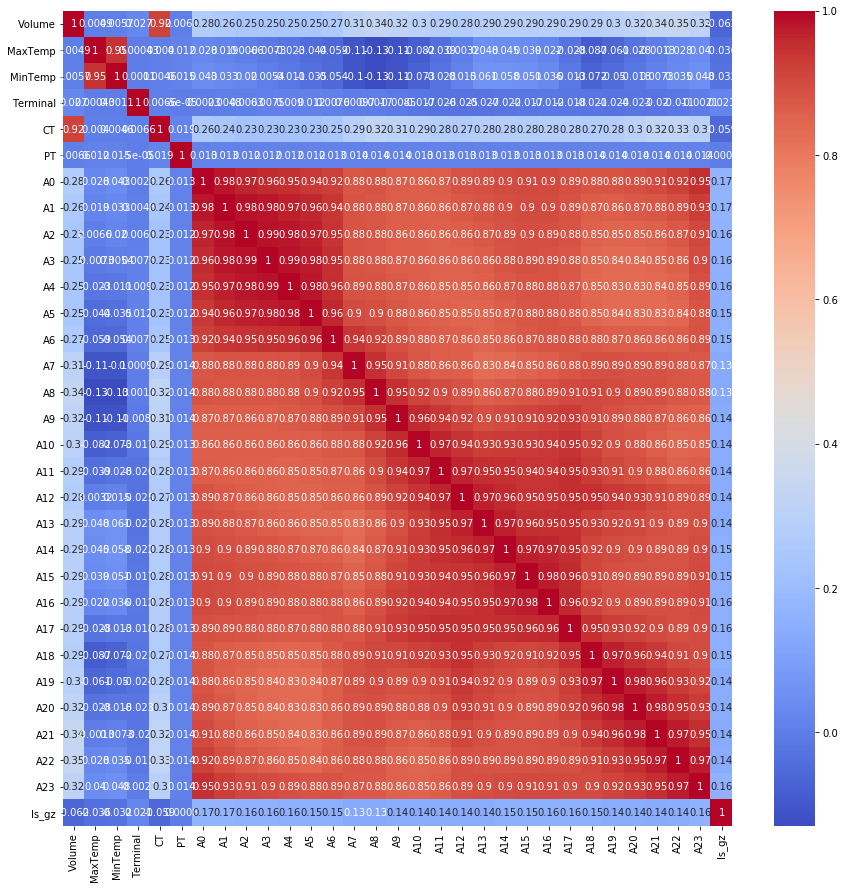

In [51]:
#heatmap (correlation analysis) -overview 
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(),annot=True,cmap='coolwarm')

In [61]:
# Seperated the columns into catergorical variables and numerical variables

num_vars=list(df_train.columns[df_train.dtypes != "object"])
cat_vars=list(df_train.columns[df_train.dtypes == "object"])
print("Categorical Variables: ",cat_vars)
print("Numerical Variables: ",num_vars)

Categorical Variables:  ['DTNumber', 'DDate', 'DType', 'UserNumber', 'UserName', 'EMANumber']
Numerical Variables:  ['Volume', 'MaxTemp', 'MinTemp', 'Terminal', 'CT', 'PT', 'A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'Is_gz']


Text(0.5, 1.0, 'Minimum Temperature of the Transformer')

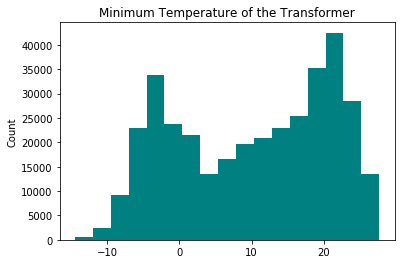

In [53]:
#Show the Minimum Temperature of the Transformer

plt.hist(df_train['MinTemp'], bins=17,color='teal')
plt.ylabel('Count')
plt.title('Minimum Temperature of the Transformer')

Text(0.5, 1.0, 'Minimum Temperature of the Transformer')

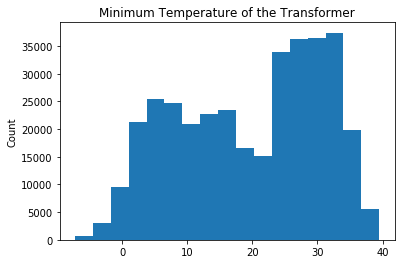

In [54]:
#Show the Maximum Temperature of the Transformer

plt.hist(df_train['MaxTemp'], bins=17)
plt.ylabel('Count')
plt.title('Minimum Temperature of the Transformer')

In [63]:
#convert DDate into Datetime function 
df_train['DDate'] =pd.to_datetime(df_train.DDate, format='%Y/%m/%d')

#extract day of week 
df_train['dayofWeek'] = df_train['DDate'].dt.dayofweek
df_train['dayofWeek'].head()

# 0 = Monday 

0    0
1    1
2    3
3    5
4    0
Name: dayofWeek, dtype: int64

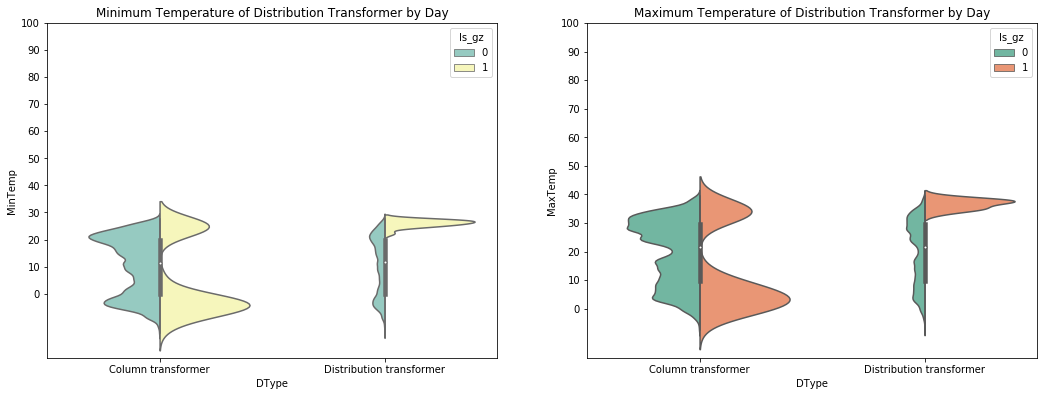

In [65]:
# #Average Age for Respective Sex 
# sns.boxplot(y='MaxTemp',x='dayofWeek',data=df_train)
# plt.title('Minimum Temperature of Distribution Transformer by Day')

#Temperature of Distribution Transformer by Day -- Column and Distrubution 
f,ax=plt.subplots(1,2,figsize=(10,6))
sns.violinplot('DType','MinTemp',hue='Is_gz',data=df_train,split=True,ax=ax[0], palette="Set3")
ax[0].set_title('Minimum Temperature of Distribution Transformer by Day')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('DType','MaxTemp', hue='Is_gz', data=df_train,split=True,ax=ax[1],palette="Set2")
ax[1].set_title('Maximum Temperature of Distribution Transformer by Day')
ax[1].set_yticks(range(0,110,10))

plt.subplots_adjust(right=1.5, top=0.9)
plt.show()